In [2]:
medical_charge_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charge_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x260af740990>)

In [3]:
import pandas as pd
import numpy as np
medical_df=pd.read_csv('medical.csv')
medical_df.to_string()
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
#ensure that  any chart you create is show in jupyter not as pop up because when you close a pop up chart goes away
#following setting will improve the default styleand font size of our chart

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['figure.figsize']=(10,7)
matplotlib.rcParams['figure.facecolor']='#00000000'


In [6]:
fig=px.scatter(medical_df,x='bmi',y='charges', color_discrete_sequence=['red','blue'],
              color='smoker', opacity=0.9,
              hover_data='children')
fig.update_traces(marker_size=5)
fig.show()

In [7]:
df2=medical_df[['age','charges','bmi','children']]
df2

,age,charges,bmi,children
0,19,16884.92400,27.900,0
1,18,1725.55230,33.770,1
2,28,4449.46200,33.000,3
3,33,21984.47061,22.705,0
4,32,3866.85520,28.880,0
...,...,...,...,...
1333,50,10600.54830,30.970,3
1334,18,2205.98080,31.920,0
1335,18,1629.83350,36.850,0
1336,21,2007.94500,25.800,0


In [8]:
df2.corr()

,age,charges,bmi,children
age,1.000000,0.299008,0.109272,0.042469
charges,0.299008,1.000000,0.198341,0.067998
bmi,0.109272,0.198341,1.000000,0.012759
children,0.042469,0.067998,0.012759,1.000000


Text(0.5, 1.0, 'Correlation')

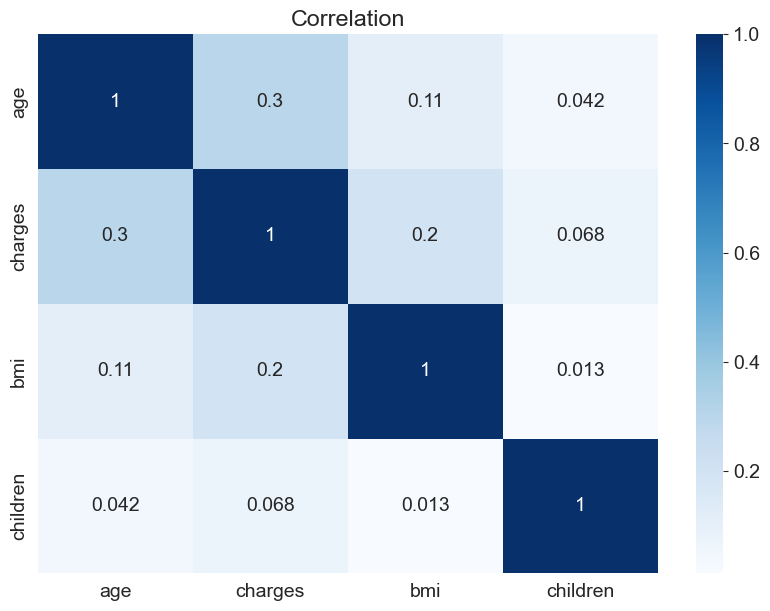

In [9]:
sns.heatmap(df2.corr(),cmap='Blues',annot=True)
plt.title('Correlation')

In [10]:
non_smoke_df=medical_df[medical_df.smoker=='no']
non_smoke_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [11]:
smoke_df=medical_df[medical_df.smoker=='yes']
smoke_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [12]:
# model creation
#charges for non smokers
def estimate_charge(age,w,b):
    return w*age+b
# the estimate charge function is model

In [13]:
w=90
b=200

non_smoke_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [14]:
ages=non_smoke_df.age
est_charge=estimate_charge(ages,w,b)
est_charge

1       1820
2       2720
3       3170
4       3080
5       2990
        ... 
1332    4880
1333    4700
1334    1820
1335    1820
1336    2090
Name: age, Length: 1064, dtype: int64

In [15]:
fig=px.line(x=ages,y=est_charge)
# fig.update_traces(marker_size=8)
fig.update_layout(
    xaxis_title='Ages',
    yaxis_title='Charges',
    title='Age vs Charges'
)
fig.show()

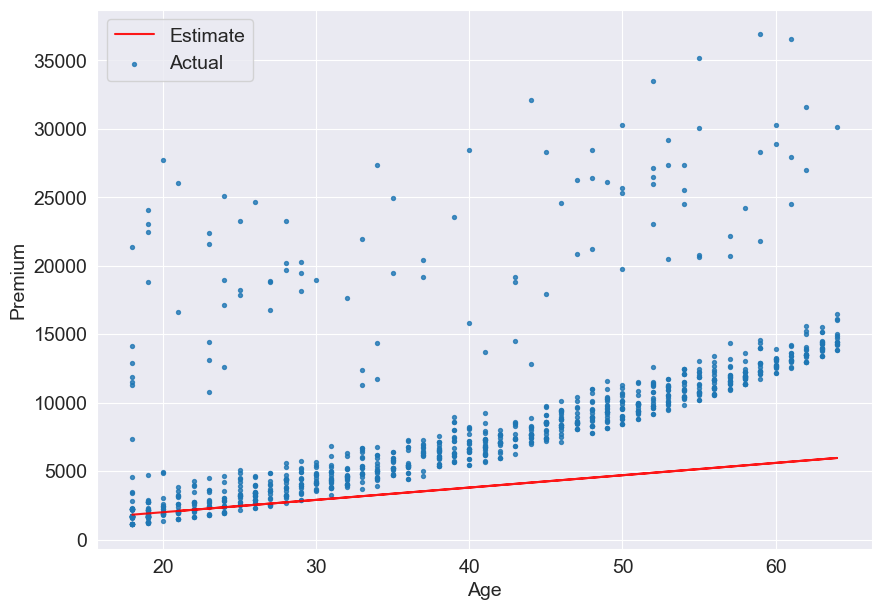

In [16]:
target=non_smoke_df.charges
plt.plot(ages,est_charge,'r',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Premium')
plt.legend(['Estimate','Actual'])

In [18]:
def try_parameter(w,b):
    age=non_smoke_df.age
    target=non_smoke_df.charges
    est_charge=estimate_charge(ages,w,b)

    plt.plot(age,est_charge,'r',alpha=0.9)
    plt.scatter(age,target,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Premium')
    plt.legend(['Estimate','Actual'])

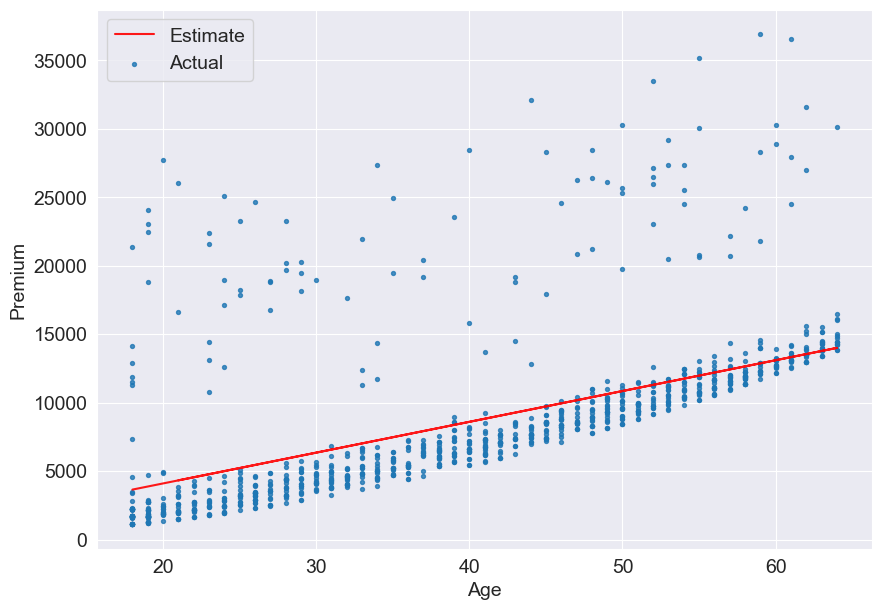

In [19]:
try_parameter(225,-400)

In [20]:
# functionn for calculating RMSE
def RMSE(prediction,target):
    result=np.sqrt(np.mean(np.square(prediction-target)))
    return result

In [21]:
target=non_smoke_df.charges
prediction=estimate_charge(ages,w,b)
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [22]:
prediction

1       1820
2       2720
3       3170
4       3080
5       2990
        ... 
1332    4880
1333    4700
1334    1820
1335    1820
1336    2090
Name: age, Length: 1064, dtype: int64

In [23]:
output=RMSE(prediction,target)
output

7068.005174513621

In [24]:
def try_parameter(w,b):
    ages=non_smoke_df.age
    target=non_smoke_df.charges
    prediction=estimate_charge(ages,w,b)
    
    plt.plot(ages,prediction,'r',alpha=0.9)
    
    plt.scatter(ages,target,alpha=0.8,s=8)
    plt.xlabel("ages")
    plt.ylabel('Premium')
    
    loss=RMSE(prediction,target)
    print("loss",loss)

loss 4700.84340359033


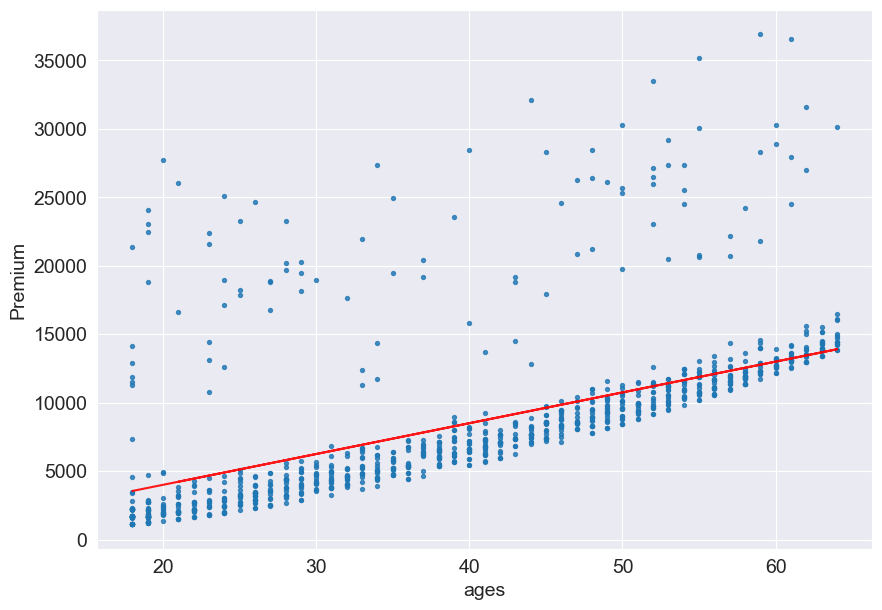

In [25]:
try_parameter(225,-500)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
inputt=non_smoke_df[['age']]
target=non_smoke_df['charges']
type(inputt)
type(target)
print(inputt.shape)
print(target.shape)

(1064, 1)
(1064,)


In [29]:
model.fit(inputt,target
         )

LinearRegression()

In [30]:
prediction=model.predict(inputt)
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [31]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [32]:
RMSE(target,prediction)

4662.505766636395

In [33]:
model.coef_

array([267.24891283])

In [34]:
model.intercept_

-2091.4205565650864

loss 4662.505766636395


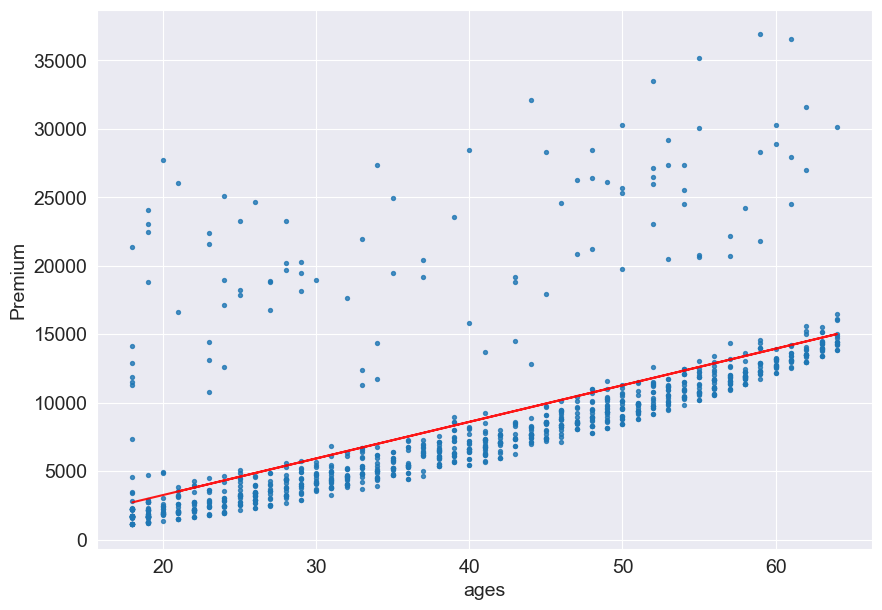

In [35]:
try_parameter(model.coef_,model.intercept_)

In [37]:
inputs,targets=smoke_df[['age']],smoke_df['charges']
Model=LinearRegression().fit(inputs,targets)
prediction=Model.predict(inputs)
loss=RMSE(targets,prediction)
print('Loss',loss)
# working of whole model

Loss 10711.00334810241


loss 24338.502872599212


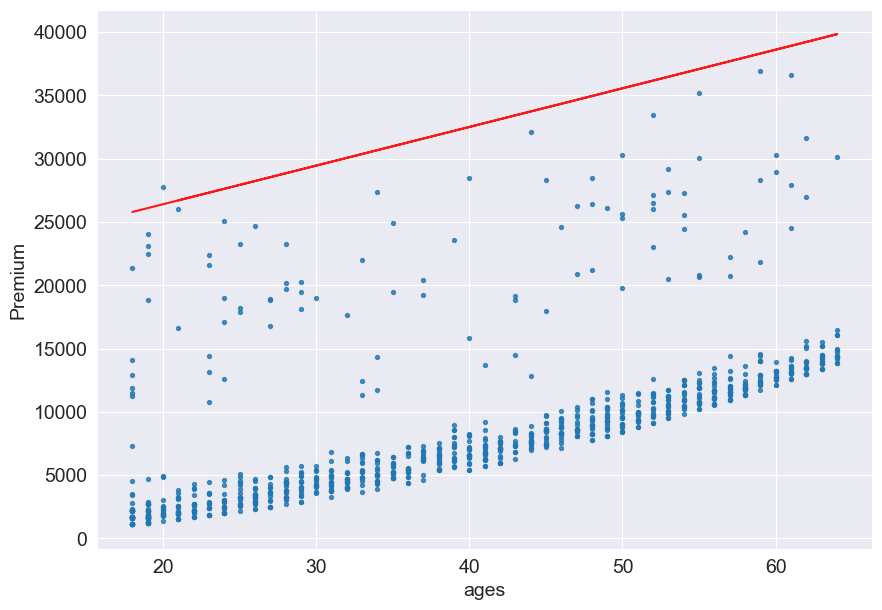

In [38]:
try_parameter(Model.coef_,Model.intercept_)

In [40]:
inputs,targets=medical_df[['age','bmi','children']],medical_df['charges']
Model2=LinearRegression().fit(inputs,targets)
prediction=Model2.predict(inputs)
loss=RMSE(targets,prediction)
print('Loss',loss)
# working of whole model

Loss 11355.317901125973


In [41]:
smoke_df.charges.corr(smoke_df.bmi)
# as shown children doesnot have a good relation with charges

0.8064806070155393

In [42]:
Model2.coef_,Model2.intercept_

(array([239.99447429, 332.0833645 , 542.86465225]), -6916.243347787036)

In [43]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_codes']=medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [44]:
medical_df.charges.corr(medical_df.smoker_codes)

0.7872514304984782

In [45]:
#for catergorical data
inputs,targets=medical_df[['age','bmi','children','smoker_codes']],medical_df['charges']

model=LinearRegression().fit(inputs,targets)

Prediction=model.predict(inputs)

loss=RMSE(targets,Prediction)
loss

6056.439217188081

In [46]:
# As above shows by using categorical data loss is reduced by almost 50 per


In [47]:
sex_col={'male':1,'female':0}
medical_df['sex_col']=medical_df.sex.map(sex_col)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [48]:
#for catergorical data
inputs,targets=medical_df[['age','bmi','children','smoker_codes','sex_col']],medical_df['charges']

model=LinearRegression().fit(inputs,targets)

Prediction=model.predict(inputs)

loss=RMSE(targets,Prediction)
loss

6056.100708754546

In [57]:
medical_df.charges.corr(medical_df.sex_col)

0.05729206220202531

In [58]:
# as above shows there is no much relaation between charges and sex_col so it does not make a great impact

<Axes: xlabel='region', ylabel='charges'>

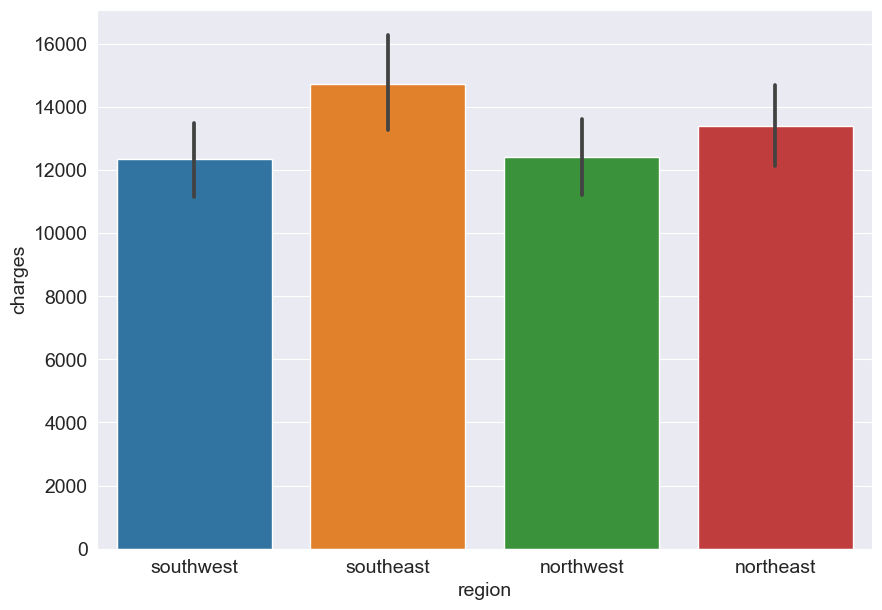

In [49]:
sns.barplot(medical_df,x='region',y='charges')

In [56]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
# finding categories from region column
enc.fit(medical_df[['region']])
# for sawing categories of array that created from   region column 
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [57]:
enc.transform([['northeast'],
               ['northwest']]).toarray()
# tranform categories into array

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [58]:
one_hot=enc.transform(medical_df[['region']]).toarray()
# transform all categories into different array

In [59]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [60]:
# adding different categories column values into their column
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [61]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [63]:
#for catergorical data after using one hot encoding
inputs,targets=medical_df[['age','bmi','children','smoker_codes','sex_col','northeast', 'northwest', 'southeast', 'southwest']],medical_df['charges']

model=LinearRegression().fit(inputs,targets)

Prediction=model.predict(inputs)

loss=RMSE(targets,Prediction)
loss

6041.6796511744515

In [64]:
# hardly any change in loss this clearly states that there is no relation of charges on region

In [65]:
model.coef_,model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

In [66]:
inputs.loc[10]

age             25.00
bmi             26.22
children         0.00
smoker_codes     0.00
sex_col          1.00
northeast        1.00
northwest        0.00
southeast        0.00
southwest        0.00
Name: 10, dtype: float64

In [67]:
model.predict([[45,23,2,1,1,1,0,0,0]])

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([32089.66799388])

In [68]:
 model.coef_,model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

In [69]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
num_col=['age','bmi','children']
scaler=StandardScaler().fit(medical_df[num_col])
scaler

StandardScaler()

In [73]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [80]:
scaler.var_
scaler_input=scaler.transform(medical_df[num_col])
scaler_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [102]:
medical_df[num_col]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [75]:
cat_col=['smoker_codes','sex_col','northeast', 'northwest', 'southeast', 'southwest']
cat_data=medical_df[cat_col].values

In [76]:
type(cat_data)

numpy.ndarray

In [81]:
inputt=np.concatenate((scaler_input,cat_data),axis=1)
target=medical_df.charges
# passing in model
Model=LinearRegression().fit(inputt,target)

prediction=Model.predict(inputt)
loss= RMSE(target,prediction)
loss


6041.679651174452

In [82]:
inputt[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [83]:
weight_df=pd.DataFrame({'Feature':np.append(num_col+cat_col,1),
                       'Weight':np.append(Model.coef_,Model.intercept_)})
weight_df.sort_values('Weight', ascending=False)

,Feature,Weight
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_col,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [84]:
new_customer=[[23,45,6,1,0,1,0,0,0]]
scaler.transform([[23,45,6]])

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.1539595 ,  2.35184061,  4.07046519]])

In [85]:
Model.predict([[-1.1539595 ,  2.35184061,  4.07046519,1,0,1,0,0,0]])

array([35934.4007592])